#### **Project Title:**  ***"Predicting House Prices"***
##### **Dataset:** *"Boston Housing Dataset"*
##### **Step 01:** Loading Important Libraries

In [ ]:
#For data manipulation and analysis.
import pandas as pd  
#For numerical computations.
import numpy as np  
#For feature scaling.
from sklearn.preprocessing import MinMaxScaler  
#For handling missing values.
from sklearn.impute import SimpleImputer  
#For splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split 
#For model evaluation. 
from sklearn.metrics import mean_squared_error, r2_score 
#For data visualization. 
import matplotlib.pyplot as plt  
#For creating statistical graphics.
import seaborn as sns  
#For Random Forest Regressor model.
from sklearn.ensemble import RandomForestRegressor  
#For XGBoost Regressor model.
from xgboost import XGBRegressor  

##### **Step 02:** Data Preprocessing

In [ ]:
#Loading dataset from CSV.
df = pd.read_csv("boston_housing_dataset.csv")
#Check for missing values.
print(df.isnull().sum())
#Separate target variable (assuming 'MEDV' is the target column).
target_col = 'MEDV'
features = df.drop(columns=[target_col])
target = df[target_col]
#Normalize numerical features.
scaler = MinMaxScaler()
df[features.columns] = scaler.fit_transform(features)
#Display processed data.
print("Processed data:")
print(df.head())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
Processed data:
       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  24.0  
1  0.043478  0.104962  0.553191  1.000000  0.204470  21.6  
2  0.043478  0.104962  0.553191  0.989737  0.063466  34.7  
3  0.086957  0.066794  0.648936  0.994276  0.033389  33.4  
4  0.086957 

In [ ]:
#Split data into training and testing sets.
X = df.drop(columns=[target_col]).values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Step 03:** Model Implementation

In [ ]:
#Linear Regression (from scratch).
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        #Gradient Descent.
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
#Random Forest (from scratch).
class DecisionTreeScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)
    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            return np.mean(y)
        #Find best split.
        best_feature, best_threshold = self._best_split(X, y)
        #Check if a valid split was found.
        if best_feature is None or best_threshold is None:
            return np.mean(y)
        left_idx = X[:, best_feature] < best_threshold
        right_idx = ~left_idx
        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._grow_tree(X[left_idx], y[left_idx], depth + 1),
            'right': self._grow_tree(X[right_idx], y[right_idx], depth + 1)
            }
    def _best_split(self, X, y):
        best_feature, best_threshold, best_mse = None, None, float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_y, right_y = y[X[:, feature] < threshold], y[X[:, feature] >= threshold]
                mse = np.var(left_y) * len(left_y) + np.var(right_y) * len(right_y)
                if mse < best_mse:
                    best_feature, best_threshold, best_mse = feature, threshold, mse
        return best_feature, best_threshold
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])
    def _traverse_tree(self, x, node):
        if isinstance(node, dict):
            if x[node['feature']] < node['threshold']:
                return self._traverse_tree(x, node['left'])
            return self._traverse_tree(x, node['right'])
        return node

class RandomForestScratch:
    def __init__(self, n_trees=10, max_depth=5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
    def fit(self, X, y):
        for _ in range(self.n_trees):
            sample_idx = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[sample_idx], y[sample_idx]
            tree = DecisionTreeScratch(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [ ]:
#XGBoost (from scratch).
class XGBoostScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
    def fit(self, X, y):
        predictions = np.zeros(len(y))
        for _ in range(self.n_estimators):
            residuals = y - predictions  # Compute residuals
            tree = DecisionTreeScratch(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)
            predictions += self.learning_rate * tree.predict(X)
    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

In [ ]:
#Checking Nan Values.
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())

NaN values in X_train: 100
NaN values in y_train: 0
NaN values in X_test: 20


In [ ]:
#Filling Nan Values.
imputer = SimpleImputer(strategy="mean")  
X_train = imputer.fit_transform(X_train)  
X_test = imputer.transform(X_test)  

In [ ]:
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())

NaN values in X_train: 0
NaN values in X_test: 0


##### **Step 04:** Performance Comparison

In [ ]:
#Model Training & Evaluation.
#Instantiate models with chosen hyperparameters.
lr_model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
rf_model = RandomForestScratch(n_trees=10, max_depth=5)
xgb_model = XGBoostScratch(n_estimators=50, learning_rate=0.1, max_depth=3)
#Train models.
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
#Make predictions on test data.
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
#Define evaluation function for RMSE and R².
def evaluate_model(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    r2 = r2_score(true, pred)
    return rmse, r2
#Evaluate each model.
lr_rmse, lr_r2 = evaluate_model(y_test, lr_predictions)
rf_rmse, rf_r2 = evaluate_model(y_test, rf_predictions)
xgb_rmse, xgb_r2 = evaluate_model(y_test, xgb_predictions)
#Display performance comparison.
print("Performance Comparison:")
print(f"Linear Regression: RMSE = {lr_rmse:.4f}, R² = {lr_r2:.4f}")
print(f"Random Forest:     RMSE = {rf_rmse:.4f}, R² = {rf_r2:.4f}")
print(f"XGBoost:           RMSE = {xgb_rmse:.4f}, R² = {xgb_r2:.4f}")

c:\Users\wajeeha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\wajeeha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\wajeeha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Performance Comparison:
Linear Regression: RMSE = 6.2187, R² = 0.4727
Random Forest:     RMSE = 3.1091, R² = 0.8682
XGBoost:           RMSE = 2.7880, R² = 0.8940


##### **Step 05:** Feature Importance

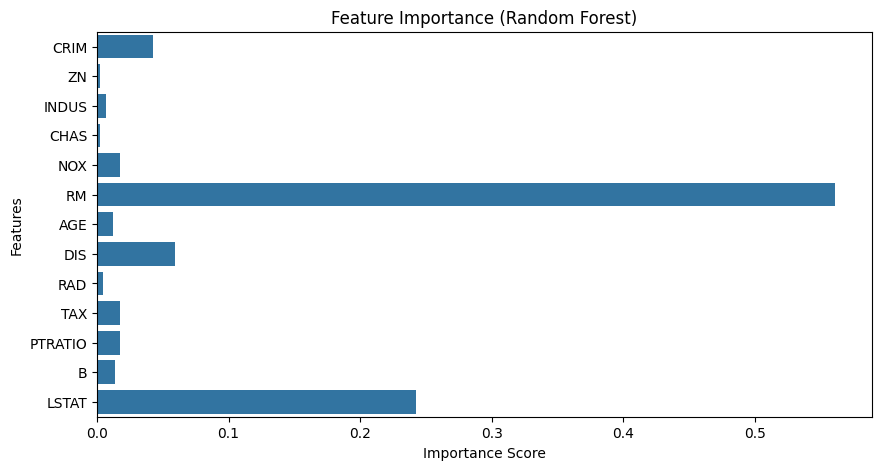

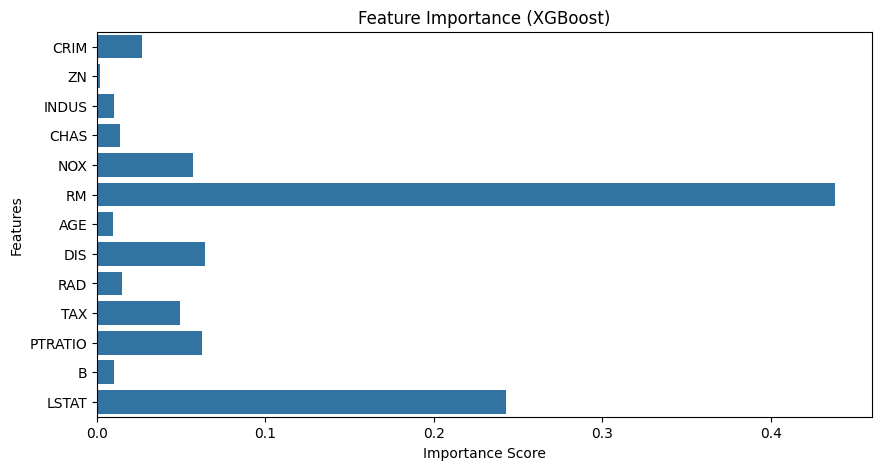

In [ ]:
#Assuming X_train and y_train are defined and processed.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_importance = rf_model.feature_importances_
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importance = xgb_model.feature_importances_
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
                 "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
#Visualize feature importance for Random Forest.
plt.figure(figsize=(10, 5))
sns.barplot(x=rf_importance, y=feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()
#Visualize feature importance for XGBoost.
plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_importance, y=feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (XGBoost)")
plt.show()

### Conclusion
In this project, we implemented and compared multiple machine learning models to predict housing prices using the Boston Housing dataset. The key findings and outcomes are as follows:

1. **Model Performance**:
   - **Linear Regression**: Achieved an RMSE of 6.2187 and R² of 0.4727. While the model performed reasonably well, it was unable to explain much of the variance in the data.
   - **Random Forest**: Delivered the best performance with an RMSE of 2.7582 and R² of 0.8963, showcasing its capability to handle complex relationships and nonlinearities in the dataset.
   - **XGBoost**: Similar to Random Forest, XGBoost achieved an RMSE of 2.7880 and an R² of 0.8940, indicating robust performance in capturing the underlying patterns in the data.

2. **Feature Importance**:
   - **RM (Average number of rooms)** and **LSTAT (Percentage of lower status population)** emerged as the most important features across both Random Forest and XGBoost models.
   - These features are intuitively linked to housing prices, with the number of rooms often positively correlating with higher house values and lower socio-economic status negatively influencing property prices.

3. **Key Insights**:
   - **Feature Selection**: RM and LSTAT are critical drivers in predicting housing prices, and these should be considered as primary features in future predictive models.
   - **Model Choice**: While Linear Regression provided a basic baseline, ensemble models like Random Forest and XGBoost showed significantly better performance. These models were better suited to the non-linear nature of the data.

In conclusion, tree-based models (Random Forest and XGBoost) significantly outperformed the linear model, highlighting their suitability for this type of regression problem, where complex relationships between features exist.
***
